### Multi Linear Regression
#### Assignment Task:

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributesice in EUROs


##### Dataset Description:
The dataset consists of the following variables:
1. Age: Age in years
2. KM: Accumulated Kilometers on odometer
3. FuelType: Fuel Type (Petrol, Diesel, CNG)
4. HP: Horse Power
5. Automatic: Automatic ( (Yes=1, No=0)
6. CC: Cylinder Volume in cubic centimeters
7. Doors: Number of doors
8. Weight: Weight in Kilograms
9. Quarterly_Tax: 
10. Price: Offer Price in EUROs

### Task-1
1. Perform exploratory data analysis (EDA) to gain insights into the dataset.
2. Provide visualizations and summary statistics of the variables.
3. Pre-process the data to apply the MLR.

#### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset.

#### Import the required Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset

In [19]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [20]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


#### Summary of the Dataset

In [23]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


#### Checking for Null values in given Dataset

In [25]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

#### Checking for duplicates.

In [27]:
df.duplicated().sum()

1

#### Dropping the duplicate rows.

In [29]:
df.drop_duplicates(df,inplace=True)

In [30]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [31]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age_08_04  1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   object
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Cylinders  1435 non-null   int64 
 9   Gears      1435 non-null   int64 
 10  Weight     1435 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 134.5+ KB


#### 2.Provide visualizations and summary statistics of the variables.

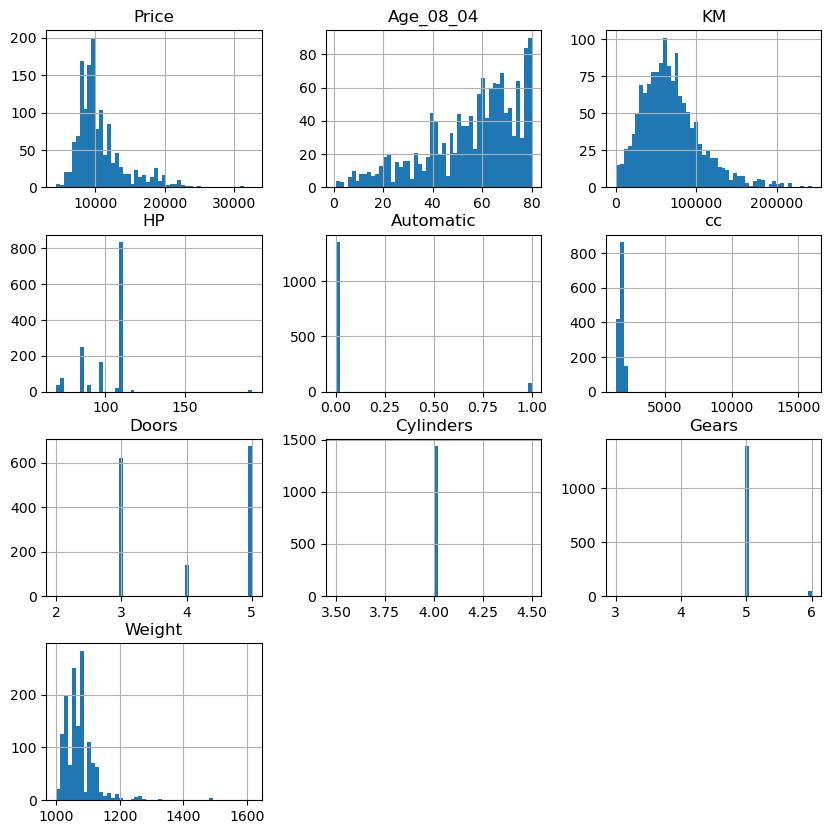

In [34]:
# Visualization of the distribution of variables
df.hist(bins=50,figsize=(10,10))
plt.show()

#### Visualizing the correlation matrix.

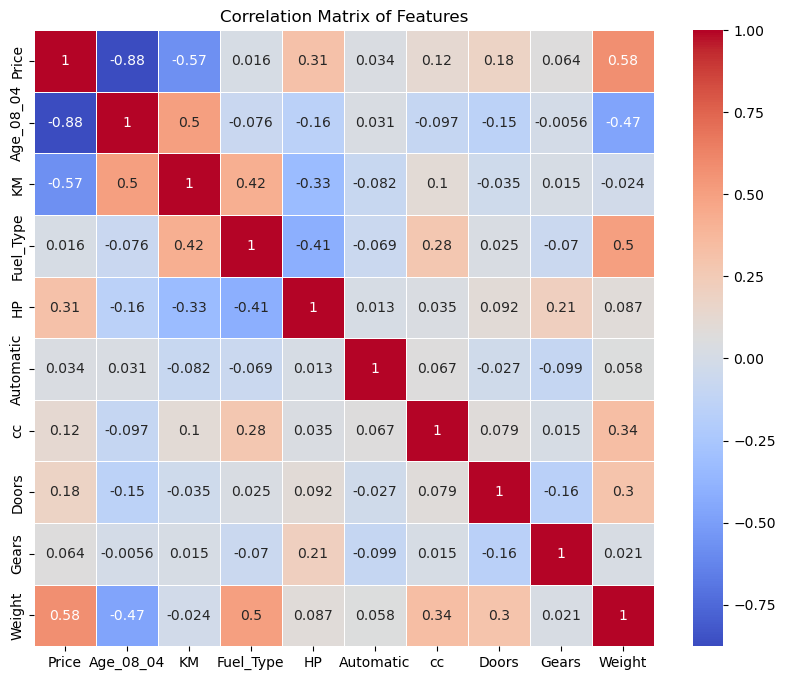

In [87]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [35]:
# Dropping the Cylinders Column Because there is no use of this Column.
df.drop(columns=['Cylinders'],inplace=True)

In [36]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


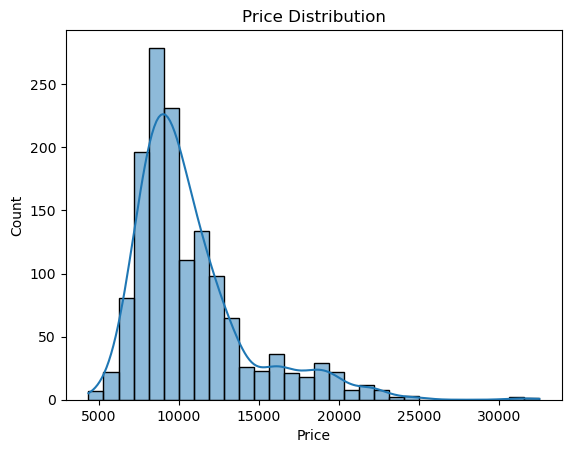

In [37]:
# Distribution of the target variable 'Price'
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

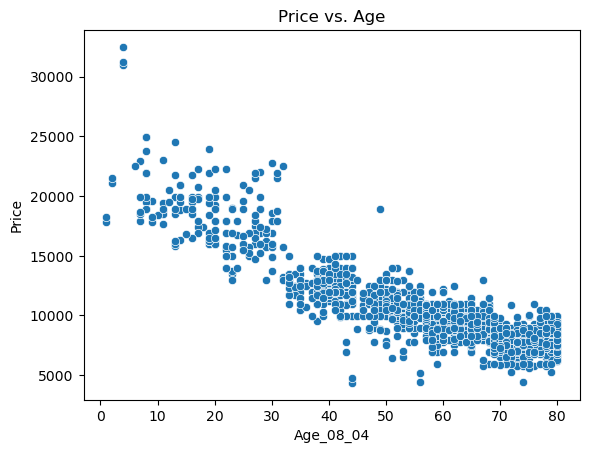

In [38]:
# Scatter plot for Age vs Price
sns.scatterplot(x='Age_08_04', y='Price', data=df)
plt.title('Price vs. Age')
plt.show()

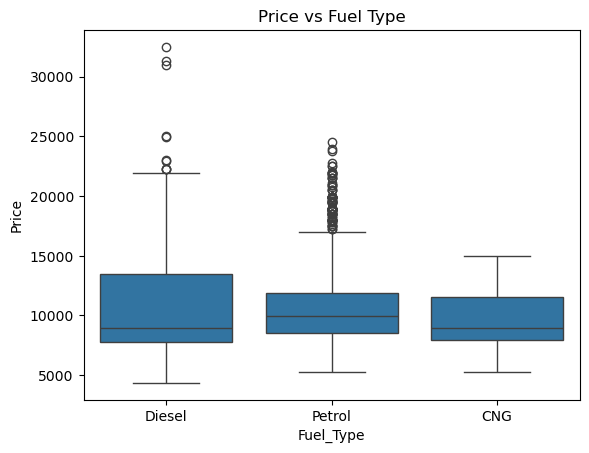

In [39]:
# Box plot for Fuel Type vs Price
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price vs Fuel Type')
plt.show()

#### 3.Pre-process the data to apply the MLR.

In [41]:
# Converting the categorical fuel_type values to numerical values.
df['Fuel_Type']=df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [42]:
# Checking the data types of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1435 non-null   int64
 1   Age_08_04  1435 non-null   int64
 2   KM         1435 non-null   int64
 3   Fuel_Type  1435 non-null   int64
 4   HP         1435 non-null   int64
 5   Automatic  1435 non-null   int64
 6   cc         1435 non-null   int64
 7   Doors      1435 non-null   int64
 8   Gears      1435 non-null   int64
 9   Weight     1435 non-null   int64
dtypes: int64(10)
memory usage: 123.3 KB


### Scaling or Standardization

In [44]:
# Scaling or Standardization of numerical features.
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
scaled_features=['Age_08_04','KM','HP','cc','Doors','Gears','Weight']
df[scaled_features]=scaler.fit_transform(df[scaled_features])

### Task-2 Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Splitting the Dataset
X=df.drop(columns=['Price'])
y=df['Price']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
print(f"Training set shape:{X_train.shape},{y_train.shape}")
print(f"Testing set shape:{X_test.shape},{y_test.shape}")

Training set shape:(1148, 9),(1148,)
Testing set shape:(287, 9),(287,)


### Task-3 
1. Build a multiple linear regression model using the training dataset.
2. Interpret the coefficients of the model.
3. Build minimum of 3 different models.

#### 1.Build a multiple linear regression model using the training dataset.

#### Model-1 Basic Linear Regression

In [54]:
# Basic Linear Regression using all Features.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [55]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
# Predictions
y_pred=model.predict(X_test)

In [57]:
# Extracting the coefficients of the features from the trained linear regression Model
coefficients=model.coef_
intercept=model.intercept_

In [58]:
# Performance metrics.
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [59]:
# Ouput Results.
print("Model-1 Basic Linear Regression")
print(f"Intercept:{intercept}")
print(f"Coefficients:{coefficients}")
print(f"Mean Squared Error:{mse}")
print(f"R² Score:{r2}")

Model-1 Basic Linear Regression
Intercept:10813.966265499523
Coefficients:[-2261.36419031  -630.47771632  -847.82042062   353.23998819
   375.45498986   -40.99906313   -57.53143043    84.4521704
  1234.17060694]
Mean Squared Error:2006554.220116539
R² Score:0.8327471995993045


#### Model-2 Linear Regression with Feature Reduction

In [61]:
# Removing less important features based on correlation or model 1 coefficients.
X_train2=X_train.drop(columns=['Doors','Gears'])
X_test2=X_test.drop(columns=['Doors','Gears'])

In [62]:
# Linear Regression with Reduced Features.
model2=LinearRegression()
model2.fit(X_train2,y_train)

LinearRegression()

In [63]:
# Predictions
y_pred2=model2.predict(X_test2)

In [64]:
# Performance metrics
mse2=mean_squared_error(y_test,y_pred2)
r2_2=r2_score(y_test,y_pred2)

In [65]:
# Output results.
print("Model 2  Linear Regression with Feature Reduction")
print(f"Mean Squared Error:{mse2}")
print(f"R² Score:{r2_2}")

Model 2  Linear Regression with Feature Reduction
Mean Squared Error:2027110.602156689
R² Score:0.8310337585031939


### Task-4 Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

#### Common Evaluation Metrics

Mean Squared Error (MSE): The average of the squares of the errors between the predicted and actual values.

Root Mean Squared Error (RMSE): The square root of MSE, providing a sense of the variance of the residuals.

Mean Absolute Error (MAE): The average of the absolute differences between predicted and actual values.

R-squared (R²) Score: The proportion of variance in the dependent variable that is predictable from the independent variables.

#### Evaluate the performance.

Low MSE indicates that the squared errors are small, but if outliers exist, MSE can be disproportionately high.


High R² (close to 1) suggests that the model explains a large portion of the variance in the dependent variable.

Both Model-1 and Model-2 performed similarly, with MSE around 2,000,000 and R² scores around 0.83, indicating that the models explained 83% of the variance in car prices.

### Task-5 Apply Lasso and Ridge methods on the model.

#### Model-3 Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
model3=Ridge(alpha=1.0)
model3.fit(X_train,y_train)

Ridge()

In [68]:
# Predictions.
y_pred3=model3.predict(X_test)

In [69]:
# Performance metrics.
mse3=mean_squared_error(y_test,y_pred3)
r2_3=r2_score(y_test,y_pred3)

In [70]:
# Output results.
print("Model-3  Ridge Regression")
print(f"Mean Squared Error:{mse3}")
print(f"R² Score:{r2_3}")

Model-3  Ridge Regression
Mean Squared Error:2003255.833580886
R² Score:0.8330221308119082


#### Model-4 Lasso Regression

In [72]:
from sklearn.linear_model import Lasso
model4=Lasso(alpha=0.1)
model4.fit(X_train,y_train)

Lasso(alpha=0.1)

In [74]:
# Predictions
y_pred4=model4.predict(X_test)

In [78]:
# Performance metrics
mse4= mean_squared_error(y_test,y_pred4)
r2_4=r2_score(y_test,y_pred4)

In [80]:
# Output results
print("Model-4  Lasso Regression")
print(f"Mean Squared Error:{mse4}")
print(f"R² Score:{r2_4}")

Model-4  Lasso Regression
Mean Squared Error:2006073.8473449792
R² Score:0.8327872402273993


### Conclusion

1. All models, including Ridge and Lasso, performed similarly with MSE values around 2,000,000 and R² scores around 0.83.
2. Feature reduction (removing less important features like Doors and Gears) did not significantly affect performance.
3. Ridge and Lasso regression methods slightly improved model generalization but had marginal effects on performance.
4. The Ridge regression model (Model-3) had the best R² score (0.8330) with the lowest MSE, making it the best-performing model among the four tested.